In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Configura il numero massimo di CPU da utilizzare (workaround per il problema di joblib)
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Sostituisci con il numero dei tuoi core fisici

import sys
project_path = os.getcwd().split("Code")[0]
sys.path.append(project_path)

try:
    from Code.notebook.graph.GraphConstructor import GraphConstructor
except ModuleNotFoundError:
    print(f"Errore: Impossibile importare 'GraphConstructor' dal percorso: {project_path}")
    print("Verifica che il percorso sia corretto e che il file 'GraphConstructor.py' esista.")
    sys.exit(1)

# Funzione per visualizzare il grafo con i cluster
def visualize_graph(graph, clusters, title="Graph Visualization"):
    unique_clusters = set(clusters)
    cluster_colors = {cluster: plt.cm.tab20(i % 20) for i, cluster in enumerate(unique_clusters)}
    node_colors = [cluster_colors[cluster] if cluster in cluster_colors else 'gray' for cluster in clusters]
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color='lightgray')
    plt.title(title)
    plt.show()

# Crea il grafo utilizzando GraphConstructor
graph_builder = GraphConstructor()
graph_builder.build_graph()
graph = graph_builder.graph

# Funzione per eseguire il clustering DBSCAN
def dbscan_clustering(graph, eps=0.3, min_samples=5):
    # Converte il grafo in una matrice di adiacenza
    adjacency_matrix = nx.to_numpy_array(graph)
    scaler = StandardScaler()
    standardized_matrix = scaler.fit_transform(adjacency_matrix)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(standardized_matrix)
    print(f"DBSCAN ha rilevato {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)} cluster e {list(cluster_labels).count(-1)} nodi di rumore.")
    return cluster_labels

# Esegui il clustering e visualizza i risultati
dbscan_clusters = dbscan_clustering(graph, eps=0.3, min_samples=5)
visualize_graph(graph=graph, clusters=dbscan_clusters, title="DBSCAN Clustering")


ModuleNotFoundError: No module named 'matplotlib'

Grafo convertito in non orientato.
Louvain ha rilevato 1879 comunità.


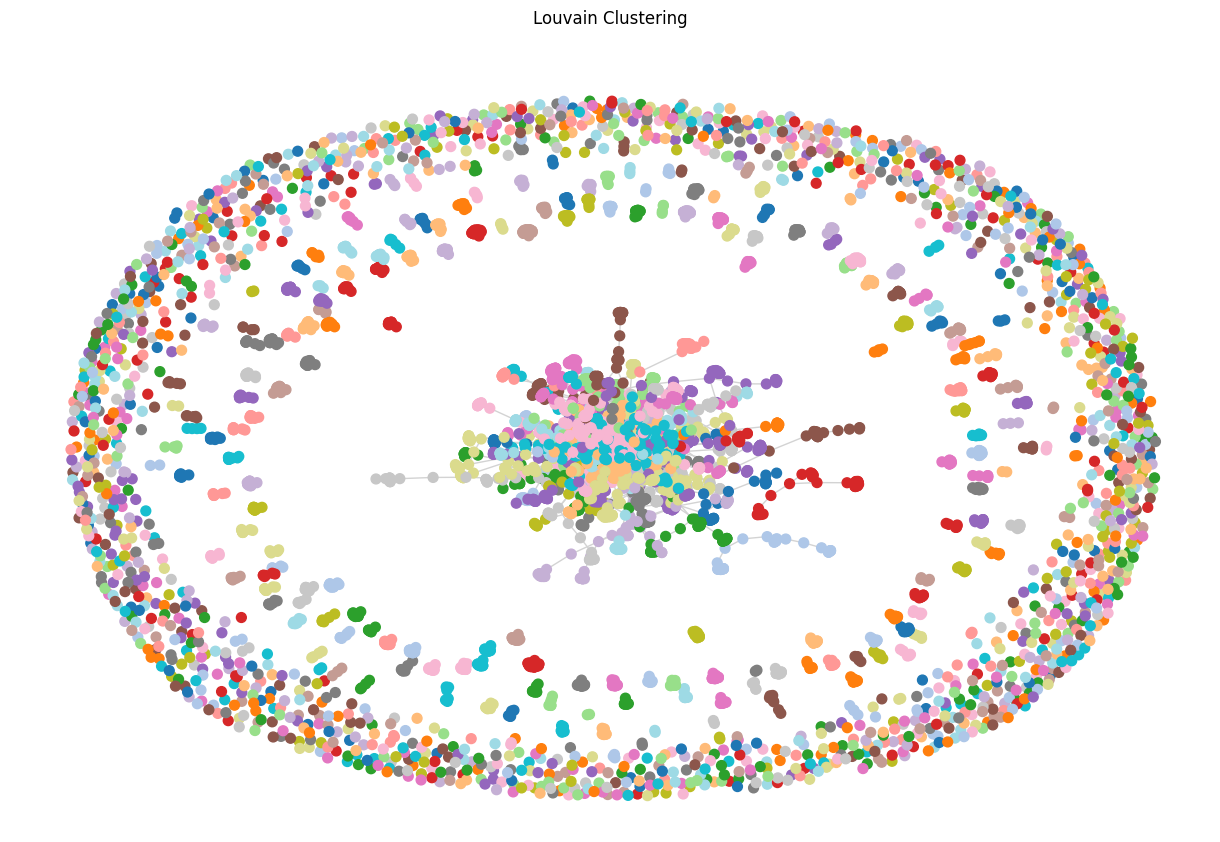

In [8]:
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain  # Per il clustering di Louvain

import sys
project_path = os.getcwd().split("Code")[0]
sys.path.append(project_path)

try:
    from Code.notebook.graph.GraphConstructor import GraphConstructor
except ModuleNotFoundError:
    print(f"Errore: Impossibile importare 'GraphConstructor' dal percorso: {project_path}")
    print("Verifica che il percorso sia corretto e che il file 'GraphConstructor.py' esista.")
    sys.exit(1)

# Funzione per visualizzare il grafo con i cluster
def visualize_graph_louvain(graph, clusters, title="Louvain Clustering"):
    unique_clusters = set(clusters.values())
    cluster_colors = {cluster: plt.cm.tab20(i % 20) for i, cluster in enumerate(unique_clusters)}
    node_colors = [cluster_colors[clusters[node]] if node in clusters else 'gray' for node in graph.nodes()]
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color='lightgray')
    plt.title(title)
    plt.show()

# Crea il grafo utilizzando GraphConstructor
graph_builder = GraphConstructor()
graph_builder.build_graph()
graph = graph_builder.graph

# Converti il grafo in un grafo non orientato
if nx.is_directed(graph):
    graph = graph.to_undirected()
    print("Grafo convertito in non orientato.")

# Funzione per eseguire il clustering Louvain
def louvain_clustering(graph):
    # Applica l'algoritmo di Louvain per rilevare le comunità
    partition = community_louvain.best_partition(graph)
    num_clusters = len(set(partition.values()))
    print(f"Louvain ha rilevato {num_clusters} comunità.")
    return partition

# Esegui il clustering Louvain e visualizza i risultati
louvain_clusters = louvain_clustering(graph)
visualize_graph_louvain(graph=graph, clusters=louvain_clusters, title="Louvain Clustering")
